# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [1]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

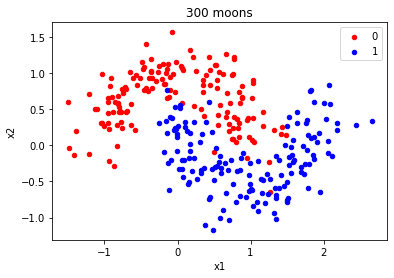

In [2]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y, ax=None):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    if not ax:
        fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
#     plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

In [3]:
import numpy as np
n = np.linspace(0, 1, 10, endpoint=True)
n

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

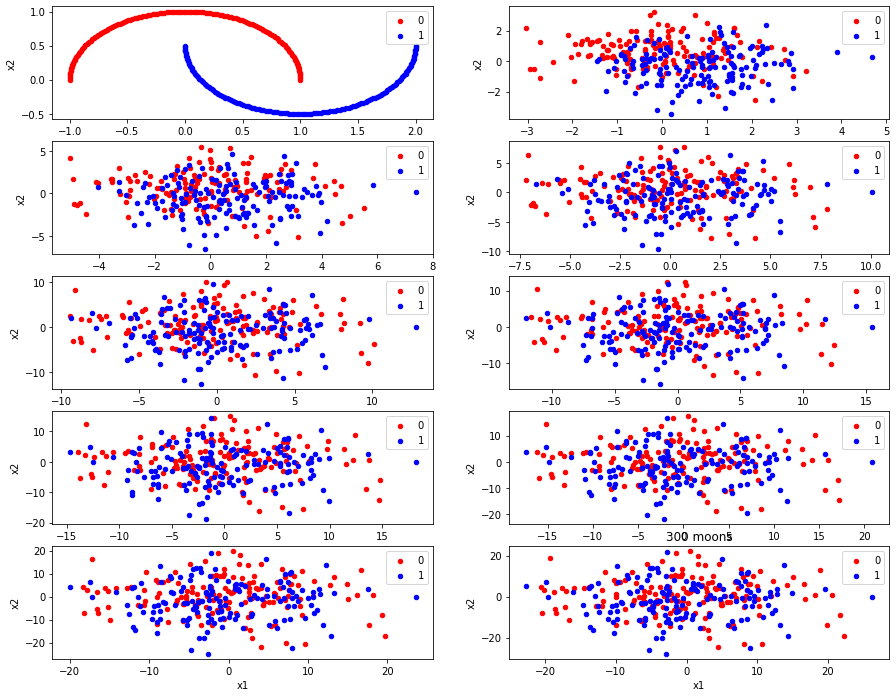

In [4]:
### Generating the moons dataset
n = np.linspace(0, 1, 10, endpoint=True)
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
axs = axs.flatten() #!!!!!!!!
for i, ax in enumerate(axs):
    X, y = make_moons(n_samples=300, noise=i, random_state=0)
    plot_moons(X, y, ax)
plt.show()

❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [5]:
 from sklearn.model_selection import train_test_split
    

X, y = make_moons(n_samples=250, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

2022-08-15 15:05:11.494216: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-15 15:05:11.494255: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:

def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    
    model = models.Sequential()
    
    model.add(layers.Dense(5, activation='relu', input_dim=2)) # 1st hidden layer with 5 neurons
    model.add(layers.Dense(4, activation='relu')) # 2nd hidden layer with 4 neurons
    model.add(layers.Dense(4, activation='relu')) # 3rd hidden layer with 3 neurons
    
    model.add(layers.Dense(1, activation='sigmoid')) # Output layer that outputs a probability of belonging
                                                 # to the class of "success"
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

2022-08-15 15:05:12.520571: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-15 15:05:12.520682: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-15 15:05:12.520773: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-93FH710P): /proc/driver/nvidia/version does not exist
2022-08-15 15:05:12.521239: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set! 

Store the results of the training into a `history` variable. ❓

In [9]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [10]:
model = initialize_model()

history = model.fit(X_train, y_train, batch_size=16, epochs=80)

Epoch 1/80
11/11 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.7714
Epoch 2/80
11/11 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7829
Epoch 3/80
11/11 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7943
Epoch 4/80
11/11 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.7943
Epoch 5/80
11/11 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.8057
Epoch 6/80
11/11 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.8057
Epoch 7/80
11/11 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.8171
Epoch 8/80
11/11 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.8229
Epoch 9/80
11/11 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8286
Epoch 10/80
11/11 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8286
Epoch 11/80
11/11 [

👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [11]:
history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7f1483c55e50>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.5929450988769531,
   0.5721646547317505,
   0.5511410236358643,
   0.533604621887207,
   0.5143133401870728,
   0.4967190623283386,
   0.4804941713809967,
   0.4641013443470001,
   0.4497215151786804,
   0.4350602924823761,
   0.4224262833595276,
   0.40939775109291077,
   0.3976546823978424,
   0.3870841860771179,
   0.37771907448768616,
   0.368673175573349,
   0.36083224415779114,
   0.35355669260025024,
   0.3468191921710968,
   0.34036606550216675,
   0.33534112572669983,
   0.3299998342990875,
   0.32570764422416687,
   0.3214249908924103,
   0.31742531061172485,
   0.31400424242019653,
   0.3108799457550049,
   0.3076988458633423,
   0.3058227002620697,
   0.3023950457572937,
   0.29995232820510864,
   0.29785242676734924,
   0.29564541578292847,
   0.29350361227989197,
   0.2919100821018219,
   0.2902811169

❓ Plot the history of the train loss using the following function ❓

In [12]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

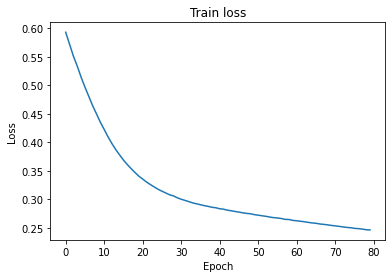

In [13]:
plot_history(history)

❓ What do you observe ❓

> YOUR ANSWER HERE

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [14]:
# Predicted probabilities
y_pred =  model.predict(scaler.transform(X_test))

❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [15]:
loss, accuracy = model.evaluate(scaler.transform(X_test), y_test)
# returns [loss, metrics]

3/3 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8933


**🧪 Test your code**

In [16]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/nikkord/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nikkord/code/nikkordalis/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/02-Your-first-Neural-Network
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_first_model.py::TestFirstModel::test_accuracy PASSED          [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master


❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

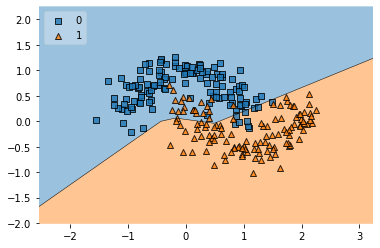

In [17]:
# or

from mlxtend.plotting import plot_decision_regions


# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)

# Adding axes annotations
# plt.xlabel('sepal length [cm]')
# plt.ylabel('petal length [cm]')
# plt.title('SVM on Iris')
plt.show()

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [18]:
model = initialize_model()

history = model.fit(X_train, y_train, batch_size=16, epochs=500)

Epoch 1/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.4800
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5371
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5771
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.6514
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.6914
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.7086
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.7543
Epoch 8/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.7886
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.8114
Epoch 10/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.8286
Epoch 11/

11/11 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.8800
Epoch 84/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8800
Epoch 85/500
11/11 [==============================] - 0s 1ms/step - loss: 0.2934 - accuracy: 0.8800
Epoch 86/500
11/11 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.8800
Epoch 87/500
11/11 [==============================] - 0s 1ms/step - loss: 0.2891 - accuracy: 0.8857
Epoch 88/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.8857
Epoch 89/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.8857
Epoch 90/500
11/11 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.8857
Epoch 91/500
11/11 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.8857
Epoch 92/500
11/11 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.8914
Epoch 93/500


11/11 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9371
Epoch 165/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1503 - accuracy: 0.9371
Epoch 166/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9429
Epoch 167/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1482 - accuracy: 0.9429
Epoch 168/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.9429
Epoch 169/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9429
Epoch 170/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1450 - accuracy: 0.9429
Epoch 171/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9429
Epoch 172/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 0.9429
Epoch 173/500
11/11 [==============================] - 0s 1ms/step - loss: 0.1423 - accuracy: 0.9429
Epoc

11/11 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.9714
Epoch 246/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0871 - accuracy: 0.9714
Epoch 247/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0872 - accuracy: 0.9657
Epoch 248/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 0.9657
Epoch 249/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9714
Epoch 250/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.9714
Epoch 251/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9714
Epoch 252/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9714
Epoch 253/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9714
Epoch 254/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0847 - accuracy: 0.9714
Epoc

11/11 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9829
Epoch 326/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9829
Epoch 327/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9829
Epoch 328/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9829
Epoch 329/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9829
Epoch 330/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9829
Epoch 331/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9714
Epoch 332/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9714
Epoch 333/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9771
Epoch 334/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9771
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9829
Epoch 406/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9829
Epoch 407/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9829
Epoch 408/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9886
Epoch 409/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9771
Epoch 410/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9829
Epoch 411/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9829
Epoch 412/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9886
Epoch 413/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9886
Epoch 414/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9886
Epoc

11/11 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9886
Epoch 487/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9886
Epoch 488/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9886
Epoch 489/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9886
Epoch 490/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9886
Epoch 491/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0478 - accuracy: 0.9886
Epoch 492/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0476 - accuracy: 0.9886
Epoch 493/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0478 - accuracy: 0.9886
Epoch 494/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0471 - accuracy: 0.9886
Epoch 495/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9886
Epoc

❓ Did the test accuracy improve? ❓

In [19]:
# Predicted probabilities
y_pred =  model.predict(scaler.transform(X_test))
loss, accuracy = model.evaluate(scaler.transform(X_test), y_test)
# returns [loss, metrics]

3/3 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.9333


<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [20]:
def initialize_model_2():
    
    #############################
    #  1 - Model architecture   #
    #############################   
    
    model = models.Sequential()
    
    model.add(layers.Dense(20, activation='relu', input_dim=2)) # 1st hidden layer with 5 neurons
    model.add(layers.Dense(10, activation='relu')) # 2nd hidden layer with 4 neurons
    model.add(layers.Dense(5, activation='relu')) # 3rd hidden layer with 3 neurons
    
    model.add(layers.Dense(1, activation='sigmoid')) # Output layer that outputs a probability of belonging
                                                 # to the class of "success"
    
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [21]:
parameters2 = model.summary()
parameters2

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                60        
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

In [22]:
model = initialize_model_2()

history2 = model.fit(X_train, y_train, batch_size=16, epochs=500)

Epoch 1/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5086
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5086
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.5143
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.5543
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.5714
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.6457
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.8057
Epoch 8/500
11/11 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.8571
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.8686
Epoch 10/500
11/11 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.8686
Epoch 11/

Epoch 83/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1094 - accuracy: 0.9657
Epoch 84/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 0.9600
Epoch 85/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.9714
Epoch 86/500
11/11 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.9600
Epoch 87/500
11/11 [==============================] - 0s 1ms/step - loss: 0.1012 - accuracy: 0.9600
Epoch 88/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0989 - accuracy: 0.9657
Epoch 89/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0974 - accuracy: 0.9657
Epoch 90/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9657
Epoch 91/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 0.9600
Epoch 92/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9714


11/11 [==============================] - 0s 1ms/step - loss: 0.0452 - accuracy: 0.9829
Epoch 165/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9829
Epoch 166/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9829
Epoch 167/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9829
Epoch 168/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9829
Epoch 169/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9886
Epoch 170/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9829
Epoch 171/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9829
Epoch 172/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9829
Epoch 173/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0433 - accuracy: 0.9829
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 0.0323 - accuracy: 0.9943
Epoch 245/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9886
Epoch 246/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9886
Epoch 247/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9886
Epoch 248/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.9943
Epoch 249/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0316 - accuracy: 0.9943
Epoch 250/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0325 - accuracy: 0.9943
Epoch 251/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0311 - accuracy: 0.9943
Epoch 252/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9943
Epoch 253/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9943
Epoc

11/11 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9943
Epoch 326/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9943
Epoch 327/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.9943
Epoch 328/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9943
Epoch 329/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9943
Epoch 330/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 0.9943
Epoch 331/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9943
Epoch 332/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9943
Epoch 333/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9943
Epoch 334/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9943
Epoc

11/11 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 0.9943
Epoch 406/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9943
Epoch 407/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9943
Epoch 408/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9943
Epoch 409/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9943
Epoch 410/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9943
Epoch 411/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.9943
Epoch 412/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.9943
Epoch 413/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9943
Epoch 414/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9943
Epoc

11/11 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 487/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 488/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 489/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 490/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 491/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 492/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 493/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 494/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 495/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 1.0000
Epoc

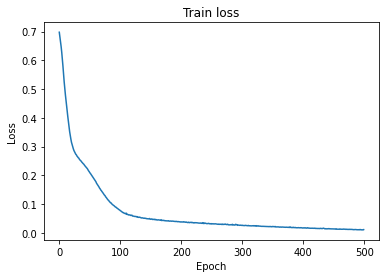

In [23]:
plot_history(history2)

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [24]:
# Predicted probabilities
y_pred =  model.predict(scaler.transform(X_test))

In [25]:
loss, accuracy_deep = model.evaluate(scaler.transform(X_test), y_test)
# returns [loss, metrics]

3/3 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.9333


🧪 **Test your code**

In [26]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/nikkord/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nikkord/code/nikkordalis/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/02-Your-first-Neural-Network
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_deeper_model.py::TestDeeperModel::test_accuracy PASSED        [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master


❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

<AxesSubplot:>

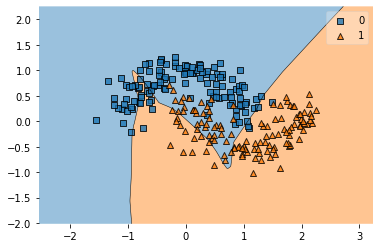

In [27]:

plot_decision_regions(X, y, model)

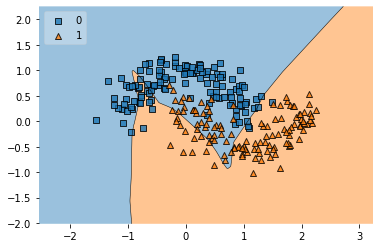

In [28]:

from mlxtend.plotting import plot_decision_regions


# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)

# Adding axes annotations
# plt.xlabel('sepal length [cm]')
# plt.ylabel('petal length [cm]')
# plt.title('SVM on Iris')
plt.show()

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!